![example](images/director_shot.jpeg)

# Microsoft Movie Studio Analysis

**Authors:** Ricky Wong
***

## Overview

Microsoft has decided they want to get into creating original video content with their own movie studio. With a list of top grossing and popular movie titles, popular genres and average runtime Microsoft will have a better understanding of the type of movies they want to make.

## Business Problem
To figure out what kind of movies Microsoft should start making, we must first find out which movies they should draw their inspirations from. From those films we can highlight the genres people enjoy watching and for Microsoft to focus on. To meet their audiences’ expectations, Microsoft would like to know how long the average movie goes for so viewers don’t feel ripped off of get bored. Exploring data from IMDb, an extensive movie database, we are able to come up with successful and popular movie titles, popular genres and average film lengths.

## Data Understanding
IMDb is an online database for information related to films and other video entertainment. We have basic data of the movies  which includes the genre, ratings, runtime and also how much each movie made.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
imdb_title_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression='gzip')
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression='gzip')
bom_movie_gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz', compression='gzip')


### IMDb Title

With the basic data we can find out which genres are popular and how long each movie runs for

In [3]:
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
imdb_title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
imdb_title_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [6]:
imdb_title_df['genres'].value_counts()

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
Biography,History,Musical            1
Biography,Music,Romance              1
Animation,Documentary,Mystery        1
Adventure,Music,Thriller             1
Music,Mystery                        1
Name: genres, Length: 1085, dtype: int64

In [7]:
imdb_title_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


### IMDb Ratings
The average rating and number of votes for each movie. We will need to link this with the previous data set to know the names of the movies.

In [8]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
imdb_title_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### BOM Gross
This data set will help us find how much money each movie made domestic and overseas.

In [11]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
bom_movie_gross_df['studio'].value_counts()

IFC             166
Uni.            147
WB              140
Fox             136
Magn.           136
               ... 
AZ                1
CP                1
PBS               1
Mon               1
Darin Southa      1
Name: studio, Length: 257, dtype: int64

In [14]:
pd.options.display.float_format = "{:.2f}".format
bom_movie_gross_df.describe()

,domestic_gross,year
count,3359.00,3387.00
mean,28745845.07,2013.96
std,66982498.24,2.48
min,100.00,2010.00
25%,120000.00,2012.00
50%,1400000.00,2014.00
75%,27900000.00,2016.00
max,936700000.00,2018.00


## Data Preparation


### Join IMDB title and ratings together
- Merged title and ratings as ratings only had the movie ID, now we can see the rating and know which movie it is for.
- Inner join will remove movies that do not have a rating. This is fine since we are only looking at popular movies.
- 'tconst' is useful for merging tables but is not necesarry for analysing. We can remove 'original_title' as well and just use 'primary_title'
- Renamed a few column names to make it more easy to understand
- Sorting by average rating does not actually show how popular a movie was as the number of votes were low so sort by number of votes is more indicative of popularity

In [15]:
#split up the genres 
imdb_title_df[['genre2','genre3']] = ''
imdb_title_df[['genres','genre2','genre3']] = imdb_title_df['genres'].str.split(',', expand=True)

#we are only interested in movies that have a rating/votes
imdb_movie_info = imdb_title_df.join(imdb_title_ratings_df.set_index('tconst'), on='tconst', how='inner')
imdb_movie_info.drop(['tconst','original_title'], axis=1, inplace=True)
imdb_movie_info.rename(columns = {'primary_title': 'title', 'start_year': 'year', 'genres':'genre1'}, inplace=True)

imdb_movie_info = imdb_movie_info.sort_values(by='numvotes', ascending=False)
imdb_movie_info.reset_index(drop=True, inplace=True)
imdb_movie_info.to_csv('data/cleaned_imdb_movie_info.csv', index=False)
imdb_movie_info.head(20)



,title,year,runtime_minutes,genre1,genre2,genre3,averagerating,numvotes
0,Inception,2010,148.00,Action,Adventure,Sci-Fi,8.80,1841066
1,The Dark Knight Rises,2012,164.00,Action,Thriller,None,8.40,1387769
2,Interstellar,2014,169.00,Adventure,Drama,Sci-Fi,8.60,1299334
3,Django Unchained,2012,165.00,Drama,Western,None,8.40,1211405
4,The Avengers,2012,143.00,Action,Adventure,Sci-Fi,8.10,1183655
5,The Wolf of Wall Street,2013,180.00,Biography,Crime,Drama,8.20,1035358
6,Shutter Island,2010,138.00,Mystery,Thriller,None,8.10,1005960
7,Guardians of the Galaxy,2014,121.00,Action,Adventure,Comedy,8.10,948394
8,Deadpool,2016,108.00,Action,Adventure,Comedy,8.00,820847
9,The Hunger Games,2012,142.00,Action,Adventure,Sci-Fi,7.20,795227


### Movie Gross
- Add 0 to missing gross values
- Unable to convert 'foreign_gross' to float and found values with commas for over a billion
- To maximise profits we should consider international market too not just domestic market

In [16]:
#fill in missing values
bom_movie_gross_df['domestic_gross'].fillna(0, inplace=True)
bom_movie_gross_df['foreign_gross'].fillna(0, inplace=True)

#find values with comma and update them
billion_s = bom_movie_gross_df['foreign_gross'].str.contains(',',na=False)
new_bom_movie_gross_df = bom_movie_gross_df['foreign_gross'].str.replace(',', '')
new_bom_movie_gross_df.fillna(0, inplace=True)
new_bom_movie_gross_df = pd.to_numeric(new_bom_movie_gross_df)
new_bom_movie_gross_df.loc[billion_s]*=1000000
bom_movie_gross_df['foreign_gross'] = new_bom_movie_gross_df

In [17]:
#add domestic and foreign gross
bom_movie_gross_df['total_gross'] = bom_movie_gross_df['domestic_gross'] + bom_movie_gross_df['foreign_gross']
bom_movie_gross_df = bom_movie_gross_df.sort_values(by='total_gross', ascending=False)
bom_movie_gross_df.reset_index(drop=True, inplace=True)
bom_movie_gross_df.to_csv('data/cleaned_bom_movie_gross.csv', index=False)
bom_movie_gross_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Star Wars: The Force Awakens,BV,936700000.00,1131600000.00,2015,2068300000.00
1,Avengers: Infinity War,BV,678800000.00,1369500000.00,2018,2048300000.00
2,Jurassic World,Uni.,652300000.00,1019400000.00,2015,1671700000.00
3,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
4,Furious 7,Uni.,353000000.00,1163000000.00,2015,1516000000.00
5,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
6,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
7,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
8,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00
9,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00


### Genre count
Genre count of the top 10 movies so Microsoft knows what genre to focus on. Can be easily updated if they want to include more movies to the list.

In [18]:
top_ten = imdb_movie_info.head(10)
genres = pd.Series(list(imdb_movie_info['genre1'].unique()))
genre_dict = dict.fromkeys(genres,0)

d1 = pd.DataFrame(imdb_movie_info.head(10), columns=["genre1"]).groupby('genre1').size().to_dict()
d2 = pd.DataFrame(imdb_movie_info.head(10), columns=["genre2"]).groupby('genre2').size().to_dict()
d3 = pd.DataFrame(imdb_movie_info.head(10), columns=["genre3"]).groupby('genre3').size().to_dict()

def addGenre(genre_count, add_dict, genres):
    for key in add_dict:
        for i in range(len(genre_count)):
            if key == genres[i]:
                genre_count[key] += add_dict[key]
    return genre_count

genre_dict = addGenre(genre_dict, d1, genres)
genre_dict = addGenre(genre_dict, d2, genres)
genre_dict = addGenre(genre_dict, d3, genres)
genre_dict


{'Action': 6,
 'Adventure': 6,
 'Drama': 3,
 'Biography': 1,
 'Mystery': 1,
 'Comedy': 2,
 'Crime': 1,
 'Animation': 0,
 'Horror': 0,
 'Family': 0,
 'Romance': 0,
 'Fantasy': 0,
 'Documentary': 0,
 'Sci-Fi': 4,
 'Thriller': 2,
 'Music': 0,
 'Musical': 0,
 'War': 0,
 'Western': 1,
 'History': 0,
 nan: 0,
 'Sport': 0,
 'Adult': 0,
 'Reality-TV': 0,
 'News': 0,
 'Game-Show': 0}

In [19]:
genre_df = pd.DataFrame.from_dict(genre_dict,orient='index')
genre_df.reset_index(inplace=True)
genre_df.rename(columns={'index':'Genre',0:'Count'},inplace=True)
genre_df.dropna(inplace=True)

genre_df = genre_df.loc[genre_df['Count']>0]
genre_df.sort_values(by='Count', ascending=False, inplace=True)
genre_df

,Genre,Count
0,Action,6
1,Adventure,6
13,Sci-Fi,4
2,Drama,3
5,Comedy,2
14,Thriller,2
3,Biography,1
4,Mystery,1
6,Crime,1
18,Western,1


## Data Modeling


### Top 10 Grossing Films
Knowing the total gross amount paints a better picture of a films performance. With the bar chart, it highlights how sucessful Star Wars: The Force Awakens and Avengers: Infinity War did. So Microsoft can now dive deeper and find out what made these movies so sucessful. 

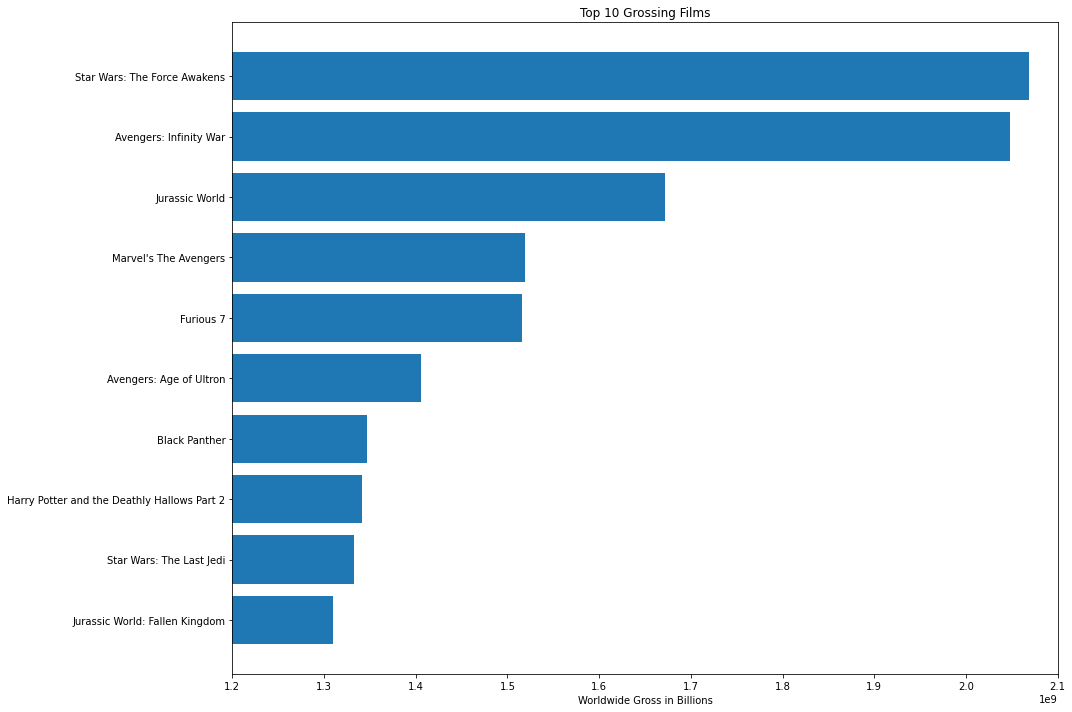

In [20]:
fig, ax = plt.subplots(figsize=(15,10))

#data variables
top_ten_title = bom_movie_gross_df['title'][:10]
top_ten_gross = bom_movie_gross_df['total_gross'][:10]

#plot graph
plt.xlim(1200000000, 2100000000)
ax.barh(top_ten_title, top_ten_gross)

#add labels
ax.set_title("Top 10 Grossing Films")
ax.set_xlabel("Worldwide Gross in Billions")
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("images/top10_gross.jpg")
plt.show()

### Vote Count
Vote count is more of a popularity contest but is still important to analyse. We've found that average ratings isn't that reliable as they might only have a few votes. So the main focus is the amount of votes each movie got while the average rating can tell us if most of those votes were good, average or bad. 

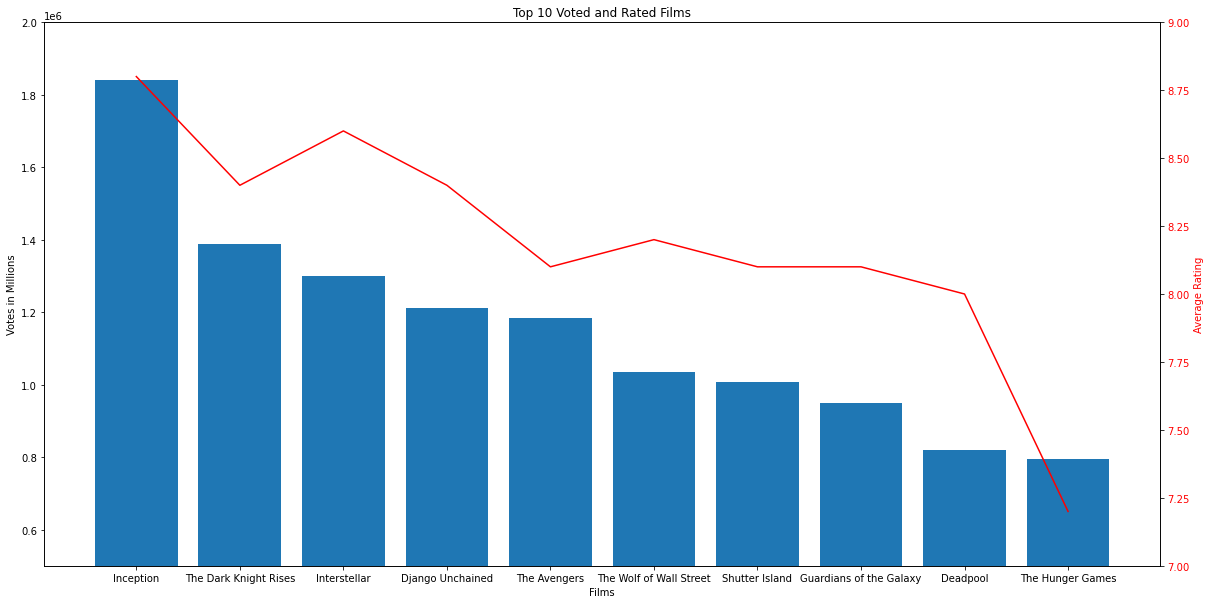

In [21]:
top_ten_vote_fig, top_ten_vote_ax = plt.subplots(figsize=(20,10))

#data variables
top_ten_vote = imdb_movie_info.head(10)
top_ten_vote_titles = top_ten_vote['title']
top_ten_vote_total = top_ten_vote['numvotes']
top_ten_vote_rating = top_ten_vote ['averagerating']

#setup bar and line
top_ten_vote_ax.bar(top_ten_vote_titles, top_ten_vote_total)
plt.ylim(500000, 2000000.0)
top_ten_vote_ax2 = top_ten_vote_ax.twinx()
top_ten_vote_ax2.plot(top_ten_vote_titles, top_ten_vote_rating, 'r')
plt.ylim(7, 9)

#add labels 
top_ten_vote_ax.set_title('Top 10 Voted and Rated Films')
top_ten_vote_ax.set_xlabel('Films')
top_ten_vote_ax.set_ylabel('Votes in Millions')

#add rating label and color
top_ten_vote_ax2.set_ylabel('Average Rating', color='r')
[tl.set_color('r') for tl in top_ten_vote_ax2.get_yticklabels()]

plt.savefig('images/top10_votes.jpg')
plt.show()

### Top 10 Movies Genre Count
These are the genres of the top 10 movies with the most votes. Some movies had more than 1 genre but we can clearly see that a lot of the movies were both action and adventure.

In [22]:
imdb_movie_info[['title', 'genre1', 'genre2','genre3']].head(10)

,title,genre1,genre2,genre3
0,Inception,Action,Adventure,Sci-Fi
1,The Dark Knight Rises,Action,Thriller,None
2,Interstellar,Adventure,Drama,Sci-Fi
3,Django Unchained,Drama,Western,None
4,The Avengers,Action,Adventure,Sci-Fi
5,The Wolf of Wall Street,Biography,Crime,Drama
6,Shutter Island,Mystery,Thriller,None
7,Guardians of the Galaxy,Action,Adventure,Comedy
8,Deadpool,Action,Adventure,Comedy
9,The Hunger Games,Action,Adventure,Sci-Fi


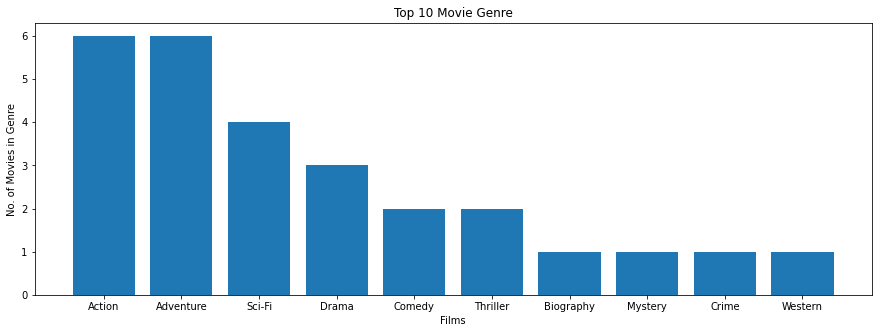

In [23]:
genre_fig, genre_ax = plt.subplots(figsize=(15,5))

#data variables
genre_type = genre_df['Genre']
genre_count = genre_df['Count']

#setup graph
genre_ax.bar(genre_type, genre_count)

#add labels
genre_ax.set_title('Top 10 Movie Genre')
genre_ax.set_xlabel('Films')
genre_ax.set_ylabel('No. of Movies in Genre')

plt.savefig('images/top10_movie_genre.jpg')
plt.show()

### Movie Runtime
Average runtime is important as movie-goers might have an expectation on movie length. They might feel ripped off if it's too short or get bored and fall a sleep if its too long. We can see that Microsoft should aim for 81 to 104 minutes. 

In [24]:
imdb_movie_info['runtime_minutes'].describe()

count   66236.00
mean       94.65
std       208.57
min         3.00
25%        81.00
50%        91.00
75%       104.00
max     51420.00
Name: runtime_minutes, dtype: float64

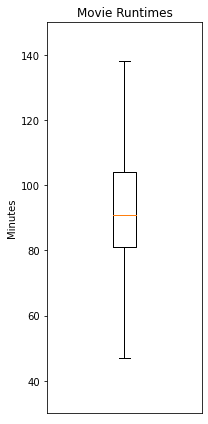

In [25]:
runtime_fig2, runtime_ax2 = plt.subplots(figsize=(3,6))

runtime_min2 = imdb_movie_info['runtime_minutes'].dropna()
runtime_ax2.boxplot(runtime_min2, showfliers=False)

runtime_ax2.set_title('Movie Runtimes')
runtime_ax2.set_ylabel('Minutes')

plt.gca().axes.get_xaxis().set_visible(False)
plt.ylim(30, 150)
plt.tight_layout()
plt.savefig('images/runtime_boxplot.jpg')
plt.show()

## Conclusions
Through this analysis we have found 4 points Microsoft’s Movie Studio should take note of.
1.	A successful film is measured in dollars, so we have a list of the top 10 grossing films. Further analysis will be needed on why these are so successful especially **Star Wars: The Force Awakens** and **Avengers: Infinity War** that made over $2 Billion worldwide
2.	Another measure of success are ratings. Apart from **The Hunger Games** the other films did well reaching an average rating of 8 or above. **Inception** did extremely well with the most votes and highest average rating. 
3.	With so many genres it can be difficult to decide what kind of movie to make. We have found half of the 10 top voted movies are **Action** and **Adventure** movies.
4.	75% of the top 10 movies run for 139 to 165 minutes. It is not a must, but the audience will be expecting a movie to run for around that long

Limitations

-	Although IMDb is such a large movie database, it does not include every single movie as the site is more aimed at western audience. However, it is only a small issue as they will most likely be Microsoft’s target audience too.
-	With the rising popularity of streaming services, tv shows/series are also viable options. But this analysis only covered movies. 

Next Steps

-	To expand on how much money a movie made, we can find out the cost of each film and how much the average movie costs. From that we may see if costs are proportionate to the total gross amount
-	Producers/Directors as well as actors also play a major part in the success of a movie. Each of them has their own style and excel at certain genres or roles. Through analysing them we may find out why some of the top movies did so well. 

